# ***Augury Work Assignment - Machine Learning***


# Overview - Speaker Gender Identification

The task we wish to tackle is speaker gender classification. The task is a well known and basic task of speech processing, and is often a preliminary stage before higher-order tasks such as speaker diarization.

We are looking at a binary classification task, based on 100 features, extracted from voice recordings of different speakers. The dataset consists of a training set with 1515 audio recordings and a test set with 460 audio recordings. Unfortunately, the names and origins of the features were lost, and we can’t reproduce which features are more or less relevant, and need to learn it from the data.

In addition, we don’t have accurate labels - we hired 5 annotators, each with a different level of skill in speaker gender classification, who gave us their best opinions. Since the task is relatively simple, we expect all annotators to be better than chance, but some may be worse than others. We need to decide on a ground truth for the data given the feedback we have.

Note that there might not be the same amount of male and female speakers in the training data - it's hard to know exactly without accurate ground truth, but one class seems more populated than the other. Despite this, we want to avoid our classifier having a bias towards one of the classes - we want to be equally accurate on both genders, as in a real world setting we expect the distribution to be more or less 50-50.


## Prerequisites - Importing the Data

There is no need to edit this cell - just run it whenever you're using the data to import it into the memory.
The local variable *features* contains 1515 examples, each having 100 features each, based on audio recordings of a single speaker each, in the form of a Pandas DataFrame.

In [6]:
from urllib.request import urlopen
import zipfile
from io import StringIO
from io import BytesIO
import pandas as pd
from IPython.display import display, HTML

response = urlopen(
    'https://github.com/augurysys/machine_learning_assignment/raw/master/augury_ml_assignment_2018.zip')
augury_ml_assignment_zip = response.read()

zip_file_strio = BytesIO(augury_ml_assignment_zip)
zip_file = zipfile.ZipFile(zip_file_strio)

feature_train_csv_data = BytesIO(zip_file.read('features_train.csv'))
features_train = pd.read_csv(feature_train_csv_data)

label_train_csv_data = BytesIO(zip_file.read('labels_train.csv'))
labels_train = pd.read_csv(label_train_csv_data)

feature_test_csv_data = BytesIO(zip_file.read('features_test.csv'))
features_test = pd.read_csv(feature_test_csv_data)

label_test_csv_data = BytesIO(zip_file.read('labels_test_true.csv'))
labels_test = pd.read_csv(label_test_csv_data)


display(features_train)
display(labels_train)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99,Feature 100
0,4.439813,1.111852,9.654271,15.847790,1.939385,19.641524,0.149465,-3.716539,13.982656,0.110687,...,-10.927978,-31.137819,0.090050,-4.109929,-13.090522,1.532822,5.052170,1.022600,-5.249803,8.011507
1,5.646592,0.984627,12.184933,20.473517,2.688508,24.854832,0.215365,-5.477567,17.749226,0.125854,...,-13.464064,-37.124982,0.209756,-5.041841,-16.660956,0.653725,5.848873,1.357823,-6.514128,10.076266
2,5.510505,1.537500,11.553486,22.425871,3.394388,25.614931,0.139262,-6.342006,18.259826,0.136515,...,-13.186914,-38.001452,0.268521,-5.801921,-16.191788,0.238986,5.605141,2.371446,-5.962124,10.997060
3,3.931485,0.816272,9.727030,10.763094,1.092184,16.666101,0.294288,-1.622535,11.183068,0.120075,...,-10.404408,-29.777080,0.214568,-3.165708,-12.051099,3.110172,5.533730,-0.414034,-5.813418,6.262264
4,4.796079,0.543125,11.462984,10.184339,0.148491,19.089740,0.085555,-1.108005,12.422335,0.106296,...,-12.883011,-34.300785,0.185802,-3.062539,-14.076174,4.160389,6.947012,-1.718220,-8.117579,6.379495
5,6.166876,1.240017,11.341882,26.885742,3.939389,27.599557,0.106722,-8.362732,20.729145,0.130612,...,-13.191673,-36.512197,0.237143,-5.661611,-16.949211,-2.027228,4.559953,3.580036,-5.265172,12.849646
6,4.425110,0.340365,9.824617,13.953762,1.416168,18.281698,0.089920,-2.782400,12.626480,0.075580,...,-10.989050,-27.539574,0.011699,-3.808013,-13.115025,1.053181,4.787310,-0.140214,-5.474955,6.394181
7,3.859706,1.274554,9.138864,12.944758,1.741525,17.625693,0.187943,-2.591189,11.821640,0.140878,...,-10.353678,-30.523427,0.170721,-4.033732,-11.622671,2.574657,5.262287,0.505932,-5.178832,7.053160
8,5.241284,0.445573,16.600229,1.925049,-3.097803,21.980358,0.115544,3.048757,11.955313,0.130462,...,-18.740691,-50.629081,0.261606,-2.856871,-17.880355,11.308419,12.371832,-6.386575,-15.529539,4.987647
9,6.068607,1.340242,10.462313,33.026850,6.336936,29.139510,0.102862,-11.048020,21.860864,0.129526,...,-12.315061,-32.822708,0.273716,-7.683004,-16.840961,-5.769224,2.683593,5.671082,-2.728312,14.035742


,Annotator 1,Annotator 2,Annotator 3,Annotator 4,Annotator 5
0,male,male,male,female,male
1,male,male,male,male,male
2,male,male,male,female,female
3,male,male,male,female,male
4,male,male,male,male,female
5,male,male,female,male,male
6,male,male,male,female,male
7,male,male,male,female,male
8,male,male,male,female,male
9,male,male,male,female,female


In [7]:
features_train.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99,Feature 100
0,4.439813,1.111852,9.654271,15.847790,1.939385,19.641524,0.149465,-3.716539,13.982656,0.110687,...,-10.927978,-31.137819,0.090050,-4.109929,-13.090522,1.532822,5.052170,1.022600,-5.249803,8.011507
1,5.646592,0.984627,12.184933,20.473517,2.688508,24.854832,0.215365,-5.477567,17.749226,0.125854,...,-13.464064,-37.124982,0.209756,-5.041841,-16.660956,0.653725,5.848873,1.357823,-6.514128,10.076266
2,5.510505,1.537500,11.553486,22.425871,3.394388,25.614931,0.139262,-6.342006,18.259826,0.136515,...,-13.186914,-38.001452,0.268521,-5.801921,-16.191788,0.238986,5.605141,2.371446,-5.962124,10.997060
3,3.931485,0.816272,9.727030,10.763094,1.092184,16.666101,0.294288,-1.622535,11.183068,0.120075,...,-10.404408,-29.777080,0.214568,-3.165708,-12.051099,3.110172,5.533730,-0.414034,-5.813418,6.262264
4,4.796079,0.543125,11.462984,10.184339,0.148491,19.089740,0.085555,-1.108005,12.422335,0.106296,...,-12.883011,-34.300785,0.185802,-3.062539,-14.076174,4.160389,6.947012,-1.718220,-8.117579,6.379495


In [8]:
labels_train.head()

,Annotator 1,Annotator 2,Annotator 3,Annotator 4,Annotator 5
0,male,male,male,female,male
1,male,male,male,male,male
2,male,male,male,female,female
3,male,male,male,female,male
4,male,male,male,male,female


# Assignment

Your task is to classify the recordings to the different speaker genders - *male* or *female*.
To perform classification, we suggest you use the [Scikit-Learn](http://scikit-learn.org/stable/index.html) package, which offers a rich variety of classifiers and regressors, as well as data preprocessing and manupulation tools, performance metrics and more.

Please review the code below. No need to make any changes.

In [14]:
import sklearn
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
le.fit(labels_test.as_matrix())

x_train = features_train.as_matrix()
y_train_annorators = np.zeros_like(labels_train.as_matrix())
for annotator in range(y_train_annorators.shape[1]):
    y_train_annorators[:, annotator] = \
        le.transform(labels_train.as_matrix()[:, annotator])

x_test = features_test.as_matrix()
y_test = le.transform(labels_test.as_matrix())

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/anaco

## Part 1 - Ground Truth
Please review the labels, and give a short summary of the data there. After your analysis, please answer the following questions:

1. How are each annotator's responses distributed? Is the distribution the same among all annotators?
2. Do the annotators generally agree? If not, which agree more frequently?
3. Can you suggest a way to combine all annotators' responses into a single, robust ground truth? What is the risk and the possible gain in doing so?

In [15]:
# Enter your analysis here
labels_train.head()

,Annotator 1,Annotator 2,Annotator 3,Annotator 4,Annotator 5
0,male,male,male,female,male
1,male,male,male,male,male
2,male,male,male,female,female
3,male,male,male,female,male
4,male,male,male,male,female


In [16]:
labels_train.describe()

,Annotator 1,Annotator 2,Annotator 3,Annotator 4,Annotator 5
count,1515,1515,1515,1515,1515
unique,2,2,2,2,2
top,male,male,male,female,male
freq,1295,1361,1112,765,917


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

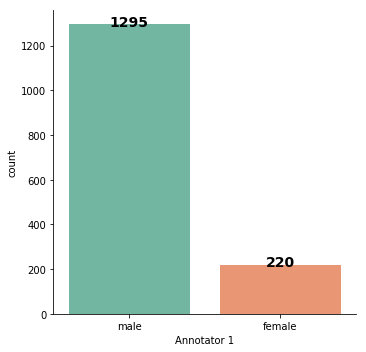

In [24]:
plot = sns.catplot(x="Annotator 1", kind="count", data=labels_train,palette='Set2')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

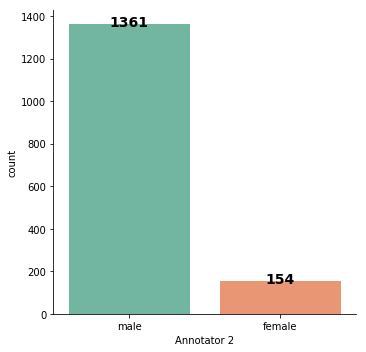

In [25]:
plot = sns.catplot(x="Annotator 2", kind="count", data=labels_train,palette='Set2')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

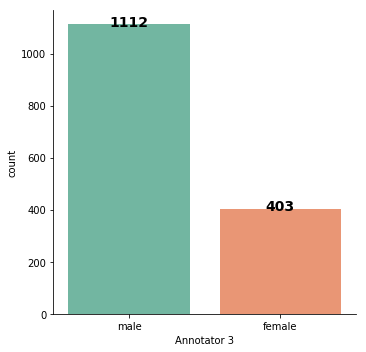

In [26]:
plot = sns.catplot(x="Annotator 3", kind="count", data=labels_train,palette='Set2')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

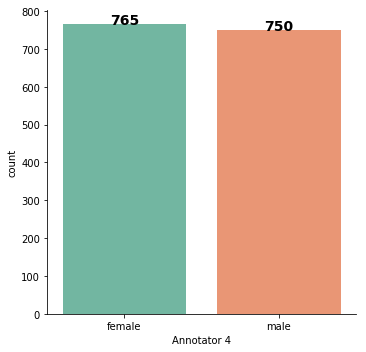

In [27]:
plot = sns.catplot(x="Annotator 4", kind="count", data=labels_train,palette='Set2')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

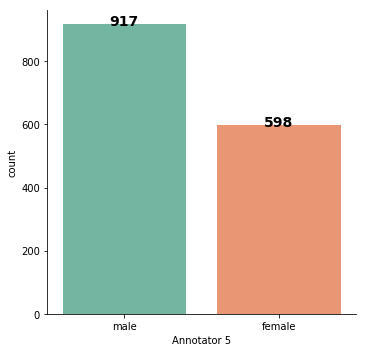

In [28]:
plot = sns.catplot(x="Annotator 5", kind="count", data=labels_train,palette='Set2')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

<img src='https://miro.medium.com/max/2322/1*mHB6Ciljb4OnOacNWgc0aw.png' /></a>

In [36]:
from nltk import agreement

In [40]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(labels_train['Annotator 1'], labels_train['Annotator 2'])

0.7388192843540142

In [42]:
cohen_kappa_score(labels_train['Annotator 1'], labels_train['Annotator 3'])

0.2983594794690323

In [43]:
cohen_kappa_score(labels_train['Annotator 1'], labels_train['Annotator 4'])

-0.00023362969693052626

In [44]:
cohen_kappa_score(labels_train['Annotator 1'], labels_train['Annotator 5'])

0.10914306202940127

In [45]:
cohen_kappa_score(labels_train['Annotator 2'], labels_train['Annotator 3'])

0.32010014852771385

In [46]:
cohen_kappa_score(labels_train['Annotator 2'], labels_train['Annotator 4'])

-0.004616721349742781

In [47]:
cohen_kappa_score(labels_train['Annotator 2'], labels_train['Annotator 5'])

0.10536741856316023

In [51]:
cohen_kappa_score(labels_train['Annotator 3'], labels_train['Annotator 4'])

-0.014441466524420576

In [52]:
cohen_kappa_score(labels_train['Annotator 3'], labels_train['Annotator 5'])

0.05250902103086719

In [53]:
cohen_kappa_score(labels_train['Annotator 4'], labels_train['Annotator 5'])

0.015912974291416138

In [31]:
from disagree import metrics 

In [110]:
labels_train_numerical=labels_train.replace('male',1).replace('female',0)

In [111]:
fleiss=metrics.Metrics(labels_train_numerical,[0,1]).fleiss_kappa()
print("Fleiss kappa: {:.2f}".format(fleiss))

Fleiss kappa: -1.46


In [63]:
from disagree import BiDisagreements
bidis = BiDisagreements(labels_train_numerical, [0,1])

In [64]:
bidis.agreements_summary()

Number of instances with:
No disagreement: 352
Bidisagreement: 1163
Tridisagreement: 0
More disagreements: 0


(352, 1163, 0, 0)

This shows that there are **352 instances** of data for which all annotators that labeled it agree. There are **1163 instances** whereby 2 of the annotators disagree on the label.

## Part 2 - Features

In this and the next sections, you can assume that the labels are those of the first annotator.
Please review the features provided, and answer the following questions:

1. Are any features correlated to each other or to the labels?
2. Can you propose a way to reduce the number of features to a smaller set (without jeopardizing classification performance)?

In [87]:
# Use only one annotator's responses as the ground truth
y_train = le.transform(labels_train.as_matrix()[:, 0])

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [ ]:
# Enter your analysis here

In [116]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [118]:
features_train['Gender'] =y_train

In [124]:
corr=features_train.corr()

In [125]:
corr.style.background_gradient(cmap='coolwarm')

In [130]:
corr['Gender'][:].sort_values()

Feature 18    -0.555290
Feature 10    -0.284902
Feature 56    -0.163119
Feature 46    -0.163119
Feature 9     -0.139157
Feature 81    -0.139104
Feature 50    -0.115544
Feature 64    -0.112348
Feature 65    -0.110391
Feature 2     -0.100127
Feature 77    -0.076678
Feature 93    -0.074520
Feature 100   -0.073754
Feature 12    -0.067895
Feature 74    -0.050498
Feature 42    -0.048530
Feature 4     -0.041402
Feature 52    -0.040906
Feature 17    -0.039008
Feature 53    -0.038865
Feature 70    -0.037824
Feature 98    -0.037230
Feature 19    -0.037173
Feature 33    -0.036672
Feature 66    -0.036237
Feature 5     -0.036089
Feature 36    -0.035921
Feature 94    -0.035269
Feature 26    -0.034864
Feature 99    -0.034689
                 ...   
Feature 86     0.035582
Feature 23     0.035876
Feature 82     0.035977
Feature 96     0.036191
Feature 76     0.036279
Feature 58     0.036424
Feature 37     0.036506
Feature 22     0.036862
Feature 88     0.037687
Feature 7      0.038274
Feature 31     0

In [ ]:
.unstack().sort_values().drop_duplicates()

It's pretty clear from the correlation table that there is multicollinearity at the moment. That means our features are correlated with each other, which can make some coefficients statistically insignificant.

The easiest way to take care of that is to create a threshold, and remove features that have a correlation higher than 90%, either positive or negative. 


In [76]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = features_train.columns[columns]
data = features_train[selected_columns]

In [83]:
data.corr().style.background_gradient(cmap='coolwarm')

,Feature 1,Feature 2,Feature 4,Feature 7,Feature 9,Feature 10,Feature 12,Feature 13,Feature 18,Feature 21,Feature 29,Feature 32,Feature 50,Feature 60,Feature 64,Feature 67,Feature 77,Feature 80,Feature 93
Feature 1,1,-0.192887,-0.923913,-0.398753,0.37076,-0.286853,-0.166231,0.00790155,-0.135036,-0.843386,-0.129241,0.313882,-0.117895,-0.30598,-0.0441527,0.26513,0.0792338,0.501403,-0.321263
Feature 2,-0.192887,1,0.417853,-0.134137,0.629995,0.489946,0.462898,-0.364833,0.403029,-0.275902,0.420866,-0.453919,0.111865,-0.164321,0.794743,-0.285586,0.311434,-0.69576,0.526689
Feature 4,-0.923913,0.417853,1,0.206579,0.000926292,0.42335,0.27514,-0.144582,0.262032,0.626602,0.234953,-0.433575,0.116388,0.178812,0.389363,-0.354338,0.0451138,-0.791195,0.454575
Feature 7,-0.398753,-0.134137,0.206579,1,-0.497181,-0.104565,-0.0607854,0.117799,-0.140728,0.5102,-0.21145,-0.00345382,0.241805,0.125552,-0.396141,-0.0407036,-0.424956,0.0999869,-0.173851
Feature 9,0.37076,0.629995,0.000926292,-0.497181,1,0.27804,0.27878,-0.316734,0.301899,-0.753834,0.253317,-0.239459,-0.0365641,-0.322834,0.894391,-0.149966,0.347174,-0.595771,0.285022
Feature 10,-0.286853,0.489946,0.42335,-0.104565,0.27804,1,0.398161,-0.680197,0.518061,0.0390574,0.639568,-0.816391,0.272325,-0.437695,0.441774,-0.766292,0.158433,-0.509736,0.626467
Feature 12,-0.166231,0.462898,0.27514,-0.0607854,0.27878,0.398161,1,-0.430639,0.407313,-0.072281,0.357764,-0.408961,0.0504995,-0.308699,0.393549,-0.218928,0.239126,-0.379962,0.44318
Feature 13,0.00790155,-0.364833,-0.144582,0.117799,-0.316734,-0.680197,-0.430639,1,-0.378852,0.1283,-0.44767,0.753893,-0.245406,0.813562,-0.325317,0.510668,-0.153786,0.339565,-0.449689
Feature 18,-0.135036,0.403029,0.262032,-0.140728,0.301899,0.518061,0.407313,-0.378852,1,-0.0778714,0.290668,-0.421959,0.0477358,-0.392501,0.385992,-0.430975,0.356399,-0.394537,0.347577
Feature 21,-0.843386,-0.275902,0.626602,0.5102,-0.753834,0.0390574,-0.072281,0.1283,-0.0778714,1,-0.0909096,-0.0869492,0.120284,0.296198,-0.473076,-0.126788,-0.257666,-0.0714628,0.0244034


## Part 3 - Classification

In this part, we want to classify the speakers to male and female speakers using the features provided. 

Before training the classifier, please answer the following question:

1. What performance metric would you use for training and evaluating your model, and why?

Finally, please choose a classifier and train it on the training data using the code below.

In [ ]:
from sklearn.metrics import 

classifier = None  
# this should be your classifier model, as represented by a 
# Scikit-learn classifier object

################################################################################
#                                                                              #
# Enter your classifier training code here                                     #
#                                                                              #
################################################################################

y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

################################################################################
#                                                                              #
# Enter here code to evaluate your model's performance on the train and test   #
# data.                                                                        #
#                                                                              #
################################################################################